# 30 Matplotlib : Labeling

How to clean a visual to make it presentable to others: title, axis, cleaning up the labels, legend, etc.

In [1]:
# importing libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data cleanup - date column
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

C:\Users\erard\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# creating a plot that we will be working with - job counts per title

job_counts = df.job_title_short.value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

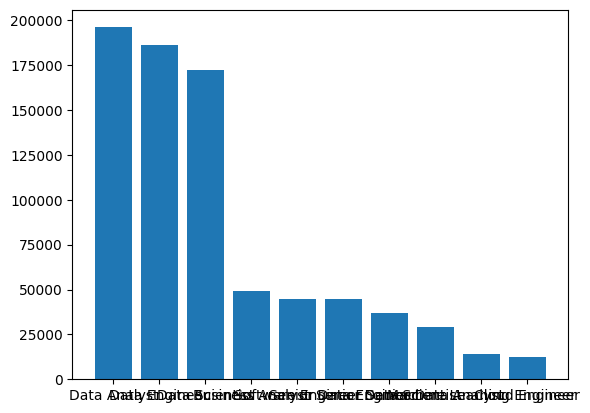

In [3]:
# plotting it on a bar chart

plt.bar(job_counts.index, job_counts)

plt.show()

## 30.1 Addind a title, labels, legend

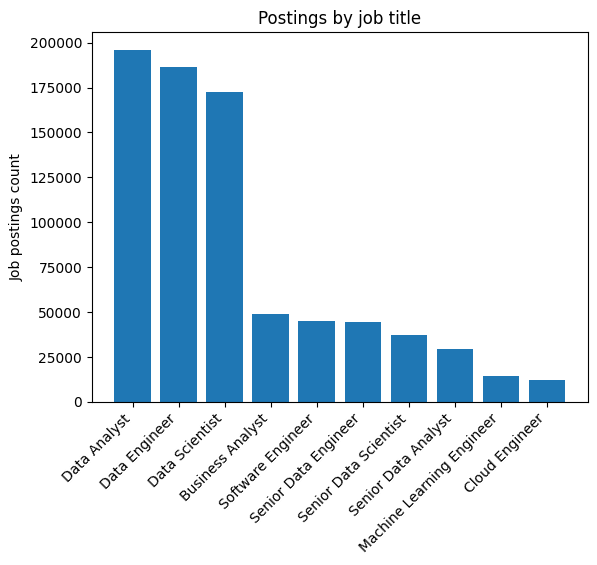

In [9]:
# title function available. We just stack the functions we want to add elements to the graphs we have
# we just need to provide a label


plt.bar(job_counts.index, job_counts)
plt.title("Postings by job title")
plt.ylabel("Job postings count")
plt.xticks(rotation=45, ha="right") # rotating the labels on the x-axis, aligning to the right (and not the default "center" option) 
plt.show()

# 30 Problems

## 1.30.1

using the same bar chart created in Matplotlib Plotting Question #1 showing the number of job postings for the job_country:

- Use the job_country column and count the number of postings for each location. Only get the top 5 job countries.
- Add labels for the x-axis (label as 'Country'), y-axis (label as 'Number of Postings'), and a title (set as 'Number of Jobs per Country') for the chart.
- Rotate the x-axis labels by 45 degrees and align them to the right.

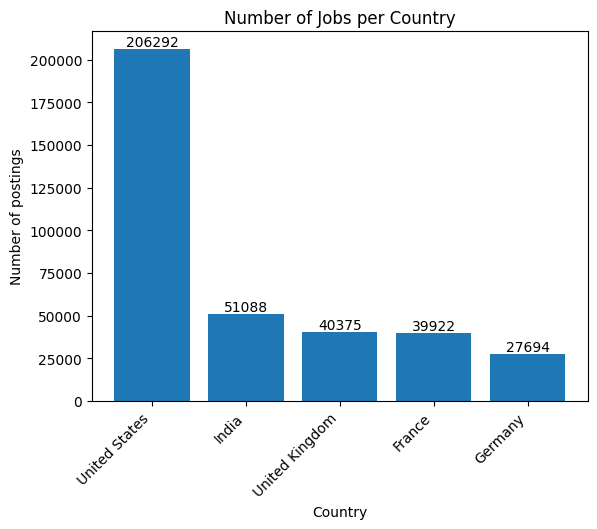

In [14]:
# group by country

job_per_country = df.job_country.value_counts().head(5)

plt.bar(job_per_country.index, job_per_country)
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of postings")
plt.title("Number of Jobs per Country")
for index, value in enumerate(job_per_country):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

-----

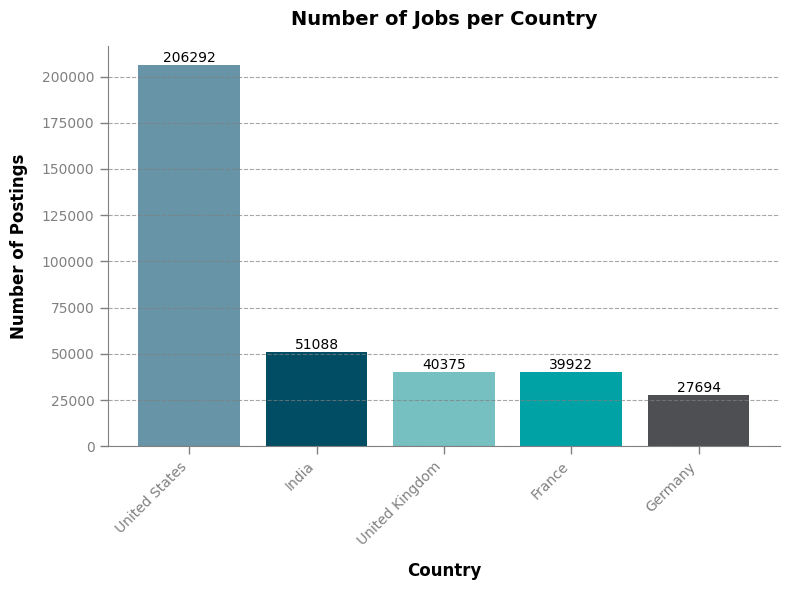

In [19]:
#trying out code from ChatGPT to make the chart look like a graph from the economist

import matplotlib.pyplot as plt

# Data
job_per_country = df.job_country.value_counts().head(5)

# Create the bar plot
fig, ax = plt.subplots(figsize=(8,6))

# Custom colors inspired by The Economist style
economist_colors = ['#6794a7', '#014d64', '#76c0c1', '#01a2a6', '#4d4f53']
bars = plt.bar(job_per_country.index, job_per_country, color=economist_colors)

# Remove top and right spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set left and bottom spine colors to a light gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Add labels and title
plt.xlabel("Country", fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel("Number of Postings", fontsize=12, fontweight='bold', labelpad=10)
plt.title("Number of Jobs per Country", fontsize=14, fontweight='bold', pad=15)

# Customize ticks
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Set tick parameters
ax.tick_params(axis='x', colors='gray', direction='out', length=6, width=1)
ax.tick_params(axis='y', colors='gray', direction='out', length=6, width=1)

# Add light horizontal gridlines (mimicking a subtle Economist style)
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
ax.xaxis.grid(False)  # Disable vertical gridlines

# Add data labels above the bars
for index, value in enumerate(job_per_country):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Adjust the layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


## 1.30.2

Using the same bar chart created in Matplotlib Plotting Question #2 showing the average yearly salary for different job titles:

- Use the 'job_title_short' and salary_year_avg columns to calculate the average salary for each job title.
- Add labels for the x-axis (label as 'Average Salary') and a title (set as 'Average Salary by Job Title') for the plot.

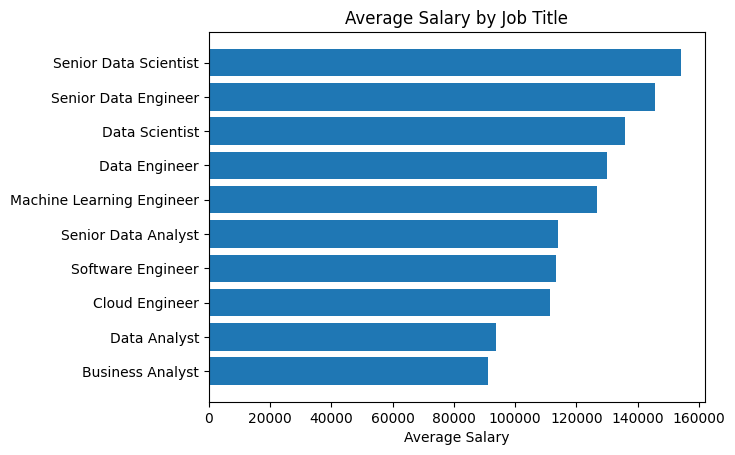

In [27]:
# average yearly salary per job title

avg_yrly_salary_job = df.groupby("job_title_short")["salary_year_avg"].mean()

avg_yrly_salary_job = avg_yrly_salary_job.sort_values(ascending=True)

# plotting

plt.barh(avg_yrly_salary_job.index, avg_yrly_salary_job)
plt.xlabel("Average Salary")
plt.title("Average Salary by Job Title")
plt.show()


## 1.30.3

Using the same line plot created in Matplotlib Plotting Question #3 showing the trend of average yearly salary over the first 6 months of the year:

- Use the job_posted_date column to extract the month and calculate the average salary for each month.
- Add labels for the x-axis (label as 'Month'), y-axis (label as 'Average Salary'), and a title (set as 'Average Salary by Job Month') for the plot.
- Change the line color to 'red' and add a legend to the plot.

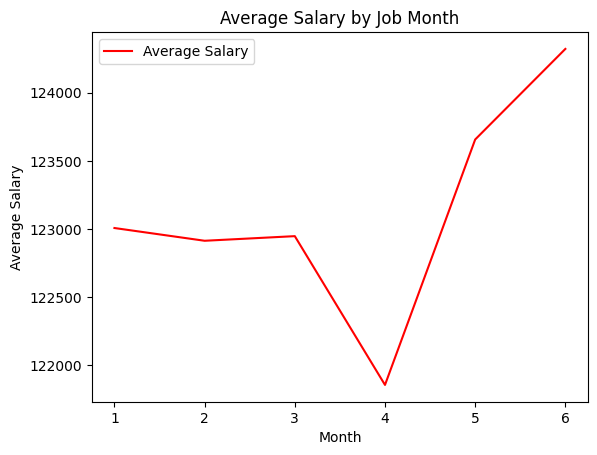

In [49]:
# creating a month column

df["job_posted_month"] = df["job_posted_date"].dt.month

# creating a new df with only the first 6 months

df = df[(df["job_posted_month"] <= 6)]

# average salary per month

salary_per_month_posted = df.groupby("job_posted_month")["salary_year_avg"].mean()

# plotting

plt.plot(salary_per_month_posted.index, salary_per_month_posted, color="red", label="Average Salary")
plt.xlabel("Month")
plt.ylabel("Average Salary")
plt.title("Average Salary by Job Month")
plt.legend()
plt.show()
